Silhouette Score: 0.18588002191620015


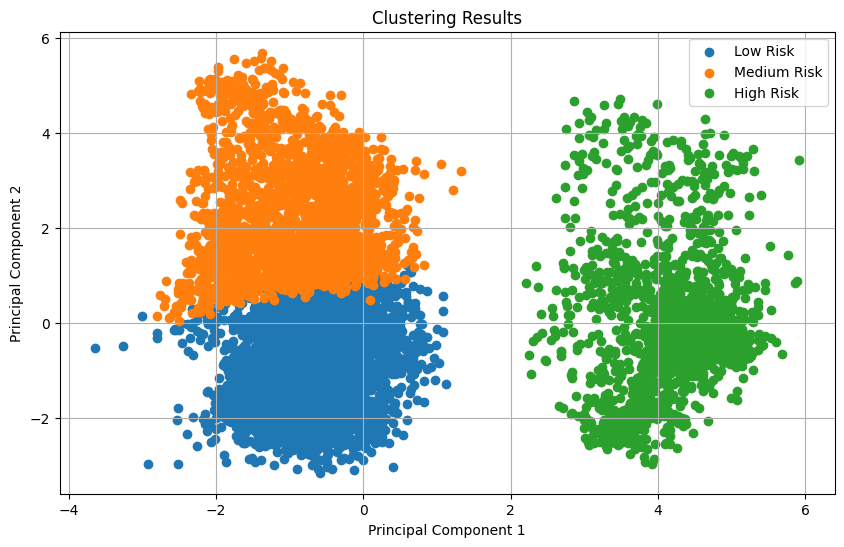

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load your dataset
data = pd.read_csv('BankChurners.csv')

# Drop unnecessary columns and one-hot encode categorical features
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
data = pd.get_dummies(data.drop(columns=categorical_features), drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Choose the number of clusters (K)
n_clusters = 3  # Example: You can choose any suitable number of clusters

# Apply K-means algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Map cluster labels to risk categories
cluster_labels_mapping = {
    0: 'Low Risk',
    1: 'Medium Risk',
    2: 'High Risk'
}

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot clustered data with risk category labels
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(data_pca[cluster_labels == cluster, 0], data_pca[cluster_labels == cluster, 1], label=cluster_labels_mapping[cluster])

plt.title('Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
